# Look at the first results of the jet 
This notebook looks at the jets in the subjects, in particular it looks at subject that contain multiple jets detected by the volunteers and checks their performance.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from aggregation import Aggregator
plt.style.use('default')
from astropy.io import ascii

Broken libmagic installation detected. The python-magic module is installed but can't be imported. Please check that both python-magic and the libmagic shared library are installed correctly. Uploading media other than images may not work.


Create the aggregator class and load in the reduced data from panoptes

In [2]:
aggregator = Aggregator('reductions/point_reducer_hdbscan_box_the_jets.csv', 
                        'reductions/shape_reducer_hdbscan_box_the_jets.csv')

Load the extractor data (we need this to calculate frame time information)

In [3]:
aggregator.load_extractor_data('extracts/point_extractor_by_frame_box_the_jets.csv',
                               'extracts/shape_extractor_rotateRectangle_box_the_jets.csv')

Load in a list of test subjects for our analysis (these contain multiple jets)

In [5]:
multijet_subjects = ascii.read('multiplejets_20220209.txt', format='fast_no_header')

For each subject (or atleas the first 5), we'll plot out the clusters for the first jet

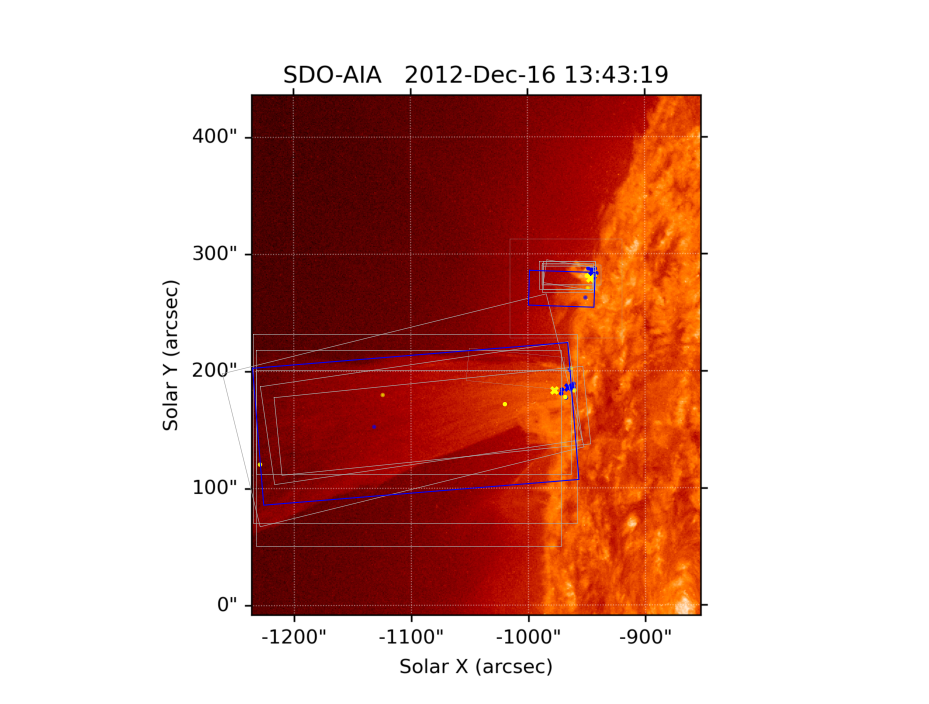

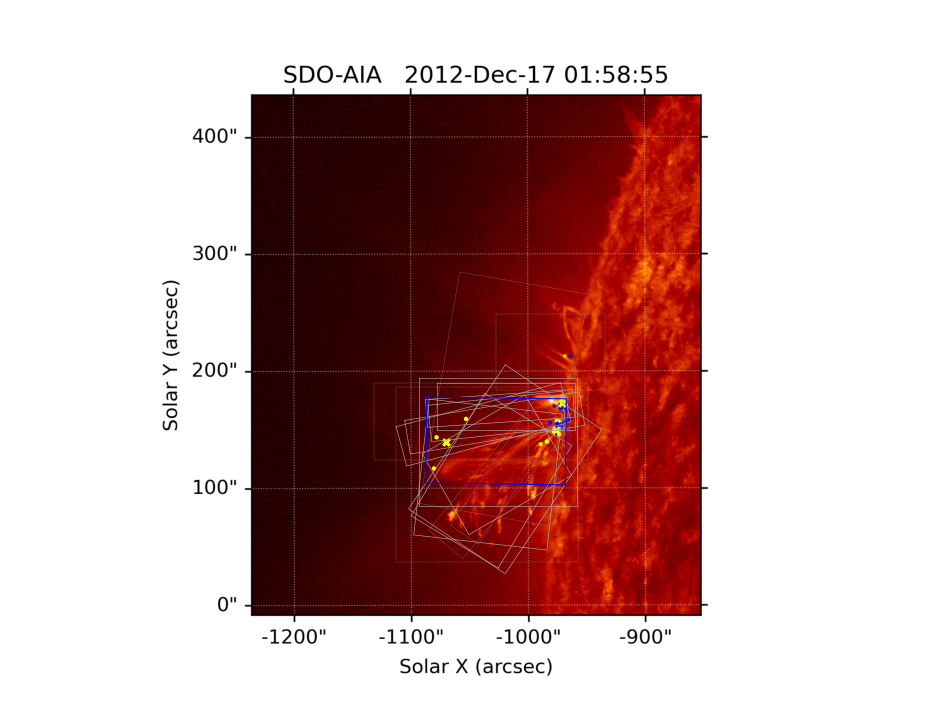

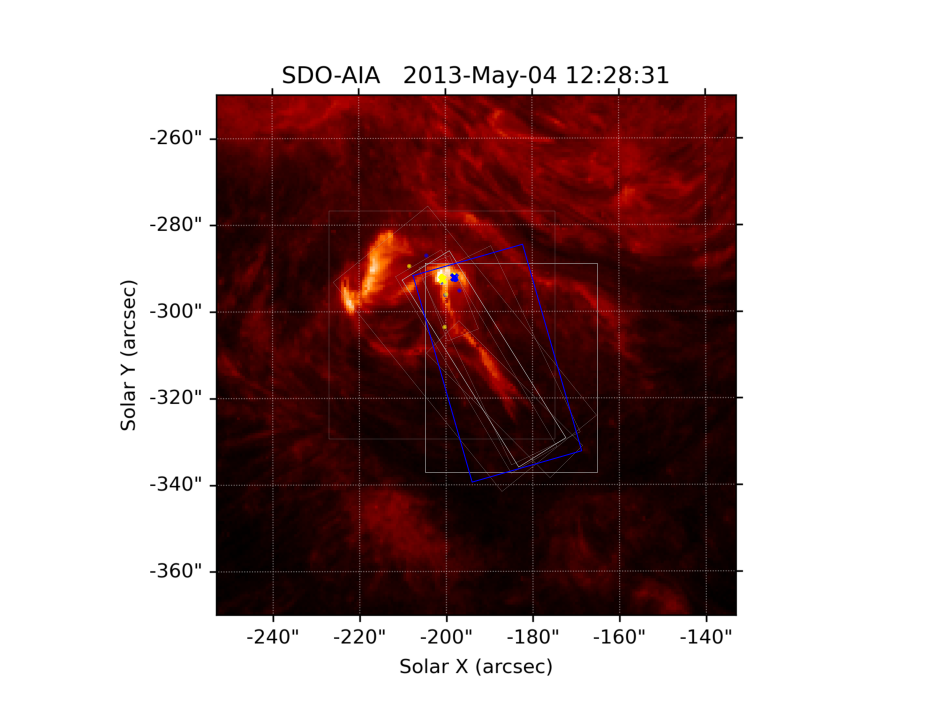

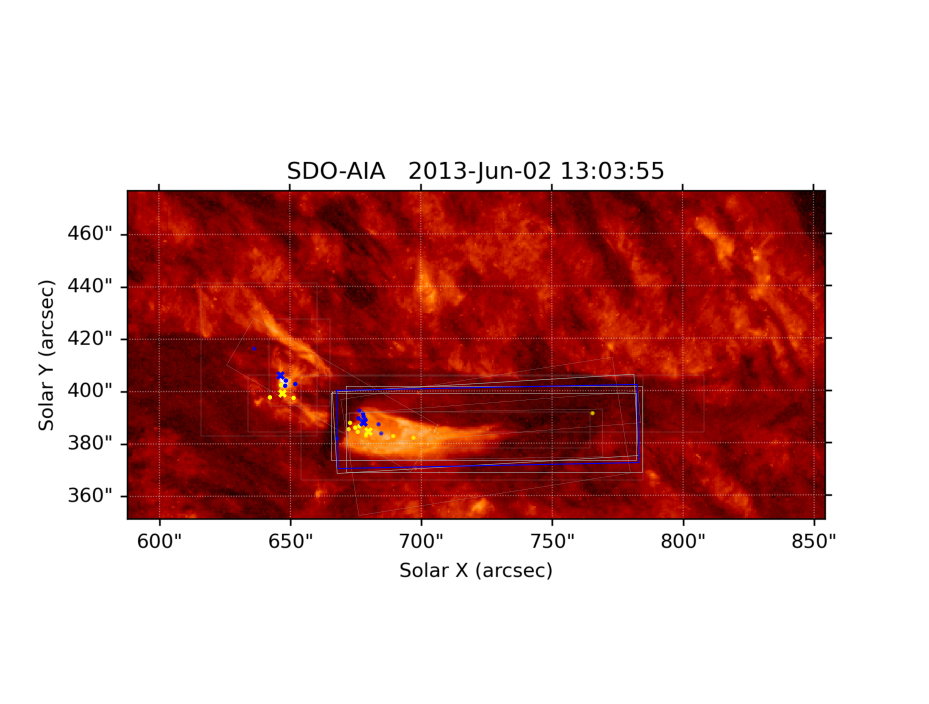

62832745 has no classification data!


In [9]:
for subject in multijet_subjects[:5]:
    ## check to make sure that these subjects had classification
    ## there's some subjects in this list that did not for some reason... (beta subjects?)
    subject_rows = aggregator.points_data[:][aggregator.points_data['subject_id']==subject[0]]
    nsubjects = len(subject_rows['data.frame0.T1_tool0_points_x'])
    
    if nsubjects > 0:
        aggregator.plot_subject(subject[0], task='T1')
    else:
        print(f"{subject[0]} has no classification data!")

Repeat for frame time information

In [11]:
for subject in multijet_subjects:
    ## same as before, do frame time calculations only for subjects with classifications
    subject_rows = aggregator.points_data[:][aggregator.points_data['subject_id']==subject[0]]
    nsubjects = len(subject_rows['data.frame0.T1_tool0_points_x'])
    
    if nsubjects > 0:
        aggregator.plot_frame_time(subject[0], task='T1')
    else:
        print(f"{subject[0]} has no classification data!")

AttributeError: 'Aggregator' object has no attribute 'plot_frame_time'